In [1]:
%pylab inline

/home/rory/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
import numpy as np
import pandas as pd

In [3]:
data = []
datapath = '/home/rory/SGX-OrderBook-Tick-Data-Trading-Strategy-/order_Book.csv'
data = pd.read_csv(datapath)

In [4]:
data.head()

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
0,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,1,1,5,0,30,72D0F3B75B454045,988500,5,1,1041500,1
1,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,2,1,266,0,30,C8946636EB1CCE9C,1142000,266,2,1115000,3
2,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,3,2,1,0,30,DC6ADEBB6E535353,979000,1,1,1041500,1
3,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,4,3,2,0,30,4005CE3E43912211,950000,2,1,1041500,1
4,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,5,1,1,0,30,FE457FBF87856C85,1041500,1,1,1041500,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 14 columns):
date                   14396 non-null object
series                 14396 non-null object
timestamp              14396 non-null object
sequence_number        14396 non-null int64
ob_position            14396 non-null int64
quantity_difference    14396 non-null int64
ob_command             14396 non-null int64
change_reason          14396 non-null int64
order_number           14396 non-null object
price                  14396 non-null int64
mp_quantity            14396 non-null int64
bid_or_ask             14396 non-null int64
bestprice              14396 non-null int64
bestsize               14396 non-null int64
dtypes: int64(10), object(4)
memory usage: 1.5+ MB


In [6]:
data.head()

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
0,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,1,1,5,0,30,72D0F3B75B454045,988500,5,1,1041500,1
1,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,2,1,266,0,30,C8946636EB1CCE9C,1142000,266,2,1115000,3
2,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,3,2,1,0,30,DC6ADEBB6E535353,979000,1,1,1041500,1
3,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,4,3,2,0,30,4005CE3E43912211,950000,2,1,1041500,1
4,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,5,1,1,0,30,FE457FBF87856C85,1041500,1,1,1041500,1


In [7]:
data['timestamp'][42]

'2015-07-31D08:45:00.111523900'

In [8]:
data1 = data.values

In [9]:
data1[44:46]

array([['2015/7/31', 'CNQ15', '2015-07-31D08:45:00.111523900', 45, 1, 1, 0,
        8, '70E05AE71BEA00EA', 1043500, 1, 1, 1043500, 1],
       ['2015/7/31', 'CNQ15', '2015-07-31D08:45:00.112523900', 46, 1, -1,
        1, 8, 'CC98E32ADCBBB95B', 0, 0, 2, 1043500, 1]], dtype=object)

In [10]:
data1[42]

array(['2015/7/31', 'CNQ15', '2015-07-31D08:45:00.111523900', 43, 1, 1, 0,
       6, 'CC98E32ADCBBB95B', 0, 1, 2, 1043500, 1], dtype=object)

In [11]:
type(data1[42][2])

str

In [12]:
data1[42][2][20:29] #== '8:45:00'

'111523900'

In [13]:
int(data1[42][2][20:29])

111523900

In [14]:
int(data1[45][2][20:29]),int(data1[45][2][20:29]) > int(data1[42][2][20:29])

(112523900, True)

In [15]:
unique(data[['change_reason']])

array([ 1,  3,  5,  6,  8, 12, 30])

In [16]:
len(data[data['change_reason'] == 3]) # change_reason = traded

1448

In [17]:
len(data[data['change_reason'] == 12]) 

2

In [18]:
data_bid = data.loc[lambda a:a.bid_or_ask == 1,:]
data_ask = data.loc[lambda a:a.bid_or_ask == 2,:]

Bid

In [19]:
#data_bid[data_bid['change_reason'] == 3]
len(data_bid[data_bid['change_reason'] == 3]) # change_reason = traded

790

In [20]:
len(data_bid[data_bid['change_reason'] == 8]) # change_reason =

560

In [21]:
len(data_bid[data_bid['change_reason'] == 1]) #change_reason = Delected

1719

In [22]:
len(data_bid[data_bid['change_reason'] == 5]) #change_reason = Amended

978

In [23]:
len(data_bid[data_bid['change_reason'] == 6]) #change_reason = added or activated

3654

In [24]:
len(data_bid[data_bid['change_reason'] == 19]) #change_reason = Good-for-Day Orders Delected

0

In [25]:
len(data_bid[data_bid['change_reason'] == 30]) #change_reason = Good-To-Cancel Orders Reloaded

29

In [26]:
len(data_bid[data_bid['ob_command'] == 2])

279

Ask

In [27]:
len(data_ask[data_ask['change_reason'] == 3]) # change_reason = traded

658

In [28]:
len(data_ask[data_ask['change_reason'] == 1]) #change_reason = Delected

1527

In [29]:
len(data_ask[data_ask['change_reason'] == 5]) #change_reason = Amended

338

In [30]:
len(data_ask[data_ask['change_reason'] == 6]) #change_reason = added or activated

2689

In [31]:
len(data_ask[data_ask['change_reason'] == 8]) #change_reason = 

1439

In [32]:
len(data_ask[data_ask['change_reason'] == 19]) #change_reason = Good-for-Day Orders Delected

0

In [33]:
len(data_ask[data_ask['change_reason'] == 30]) #change_reason = Good-To-Cancel Orders Reloaded

13

In [34]:
len(data_ask[data_ask['ob_command'] == 2]) 

202

In [35]:
data_bid.head(60)

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
0,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,1,1,5,0,30,72D0F3B75B454045,988500,5,1,1041500,1
2,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,3,2,1,0,30,DC6ADEBB6E535353,979000,1,1,1041500,1
3,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,4,3,2,0,30,4005CE3E43912211,950000,2,1,1041500,1
4,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,5,1,1,0,30,FE457FBF87856C85,1041500,1,1,1041500,1
5,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,6,2,2,0,30,E33BA3AF1965F906,1008000,2,1,1041500,1
6,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,7,5,1,0,30,54F252BB0DE2F2E3,969250,1,1,1041500,1
7,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,8,7,1,0,30,D472DABB94327932,949000,1,1,1041500,1
8,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,9,8,1,0,30,54FADAB3464C2B4C,948750,1,1,1041500,1
9,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,10,2,1,0,30,4D602BF798E67886,1020000,1,1,1041500,1
13,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,14,5,5,0,30,6AD3CB22C767AAC7,981750,5,1,1041500,1


In [36]:
data_bid.loc[lambda a:a. change_reason == 3,:].head() # traded => quantity_difference < 0

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
2667,2015/7/31,CNQ15,2015-07-31D09:00:00.053441500,2668,1,-1,2,3,E0CCC63E0638E539,1062750,9,1,1062750,1
2669,2015/7/31,CNQ15,2015-07-31D09:00:00.053441500,2670,1,-1,2,3,E0CCC63E0638E539,1062750,8,1,1062750,1
2671,2015/7/31,CNQ15,2015-07-31D09:00:00.053441500,2672,1,-1,2,3,E0CCC63E0638E539,1062750,7,1,1062750,1
2673,2015/7/31,CNQ15,2015-07-31D09:00:00.053441500,2674,1,-1,2,3,E0CCC63E0638E539,1062750,6,1,1062750,1
2675,2015/7/31,CNQ15,2015-07-31D09:00:00.054441500,2676,1,-1,2,3,E0CCC63E0638E539,1062750,5,1,1062750,1


In [37]:
data_bid.loc[lambda a:a. change_reason == 1,:].head() # Deleted => quantity_difference < 0

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
1373,2015/7/31,CNQ15,2015-07-31D08:45:44.542127900,1374,9,-1,1,1,D2537FFF43832843,1052500,0,1,1055000,37
1389,2015/7/31,CNQ15,2015-07-31D08:46:42.940605900,1390,7,-1,1,1,CA40627E418F22CF,1055000,0,1,1055000,37
1393,2015/7/31,CNQ15,2015-07-31D08:47:15.203308900,1394,4,-1,1,1,4ACF627E548538C5,1055000,0,1,1055000,36
1405,2015/7/31,CNQ15,2015-07-31D08:48:30.554633900,1406,16,-1,1,1,D478D2ABDE4BC0CB,1050000,0,1,1055000,37
1416,2015/7/31,CNQ15,2015-07-31D08:49:24.742147900,1417,16,-1,1,1,4898CA7651AE30AE,1050000,0,1,1055000,38


In [450]:
len(data_bid[(data_bid.change_reason == 3) & (data_bid.ob_command == 2)])

229

In [456]:
data_bid[(data_bid.change_reason == 3) & (data_bid.ob_command == 2)] 

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
2667,2015/7/31,CNQ15,2015-07-31D09:00:00.053441500,2668,1,-1,2,3,E0CCC63E0638E539,1062750,9,1,1062750,1
2669,2015/7/31,CNQ15,2015-07-31D09:00:00.053441500,2670,1,-1,2,3,E0CCC63E0638E539,1062750,8,1,1062750,1
2671,2015/7/31,CNQ15,2015-07-31D09:00:00.053441500,2672,1,-1,2,3,E0CCC63E0638E539,1062750,7,1,1062750,1
2673,2015/7/31,CNQ15,2015-07-31D09:00:00.053441500,2674,1,-1,2,3,E0CCC63E0638E539,1062750,6,1,1062750,1
2675,2015/7/31,CNQ15,2015-07-31D09:00:00.054441500,2676,1,-1,2,3,E0CCC63E0638E539,1062750,5,1,1062750,1
2677,2015/7/31,CNQ15,2015-07-31D09:00:00.054441500,2678,1,-1,2,3,E0CCC63E0638E539,1062750,4,1,1062750,1
2679,2015/7/31,CNQ15,2015-07-31D09:00:00.054441500,2680,1,-1,2,3,E0CCC63E0638E539,1062750,3,1,1062750,1
2681,2015/7/31,CNQ15,2015-07-31D09:00:00.054441500,2682,1,-1,2,3,E0CCC63E0638E539,1062750,2,1,1062750,1
2683,2015/7/31,CNQ15,2015-07-31D09:00:00.054441500,2684,1,-1,2,3,E0CCC63E0638E539,1062750,1,1,1062750,1
2687,2015/7/31,CNQ15,2015-07-31D09:00:00.054441500,2688,1,-1,2,3,CAD8E276F1B5D2F5,1062750,140,1,1062750,1


In [40]:
data_bid[(data_bid.change_reason == 8) & (data_bid.quantity_difference < 0)] 

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
43,2015/7/31,CNQ15,2015-07-31D08:45:00.111523900,44,1,-1,1,8,70E05AE71BEA00EA,1045750,0,1,1043500,1
50,2015/7/31,CNQ15,2015-07-31D08:45:00.146523900,51,1,-1,1,8,70E05AE71BEA00EA,1043500,0,1,1038500,2
52,2015/7/31,CNQ15,2015-07-31D08:45:00.146523900,53,2,-1,1,8,FE457FBF87856C85,1041500,0,1,1038500,2
66,2015/7/31,CNQ15,2015-07-31D08:45:00.168523900,67,1,-1,1,8,6A08E322D4EFB80F,1038500,0,1,1043500,2
68,2015/7/31,CNQ15,2015-07-31D08:45:00.168523900,69,2,-1,1,8,70E05AE71BEA00EA,1038500,0,1,1043500,2
70,2015/7/31,CNQ15,2015-07-31D08:45:00.168523900,71,3,-1,1,8,FE457FBF87856C85,1038500,0,1,1043500,2
80,2015/7/31,CNQ15,2015-07-31D08:45:00.173523900,81,1,-1,1,8,EA08E322DAD0BDF0,1043500,0,1,1047000,2
82,2015/7/31,CNQ15,2015-07-31D08:45:00.173523900,83,2,-1,1,8,6A08E322D4EFB80F,1043500,0,1,1047000,2
84,2015/7/31,CNQ15,2015-07-31D08:45:00.173523900,85,3,-1,1,8,70E05AE71BEA00EA,1043500,0,1,1047000,2
91,2015/7/31,CNQ15,2015-07-31D08:45:00.173523900,92,1,-3,1,8,629F6276A44F888F,1047000,0,1,1057500,3


In [41]:
data_bid[(data_bid.change_reason == 5) & (data_bid.ob_command == 2)] 

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
7668,2015/7/31,CNQ15,2015-07-31D09:04:01.814272500,7669,14,-2,2,5,D0B856AB98B67D76,1066750,4,1,1067250,2
7709,2015/7/31,CNQ15,2015-07-31D09:04:02.972263500,7710,15,-8,2,5,583056ABFF34E3F4,1066750,4,1,1067000,6
7714,2015/7/31,CNQ15,2015-07-31D09:04:03.497254500,7715,12,-1,2,5,5038D6A33D1221D2,1066750,2,1,1067000,5
7780,2015/7/31,CNQ15,2015-07-31D09:04:05.458236500,7781,2,-3,2,5,D0B856AB98B67D76,1066750,1,1,1066750,5
7802,2015/7/31,CNQ15,2015-07-31D09:04:05.928236500,7803,1,-2,2,5,583056ABFF34E3F4,1067000,1,1,1067000,4
7816,2015/7/31,CNQ15,2015-07-31D09:04:06.533227500,7817,3,-1,2,5,50B0D6AB27270BE7,1067000,1,1,1067000,3
8089,2015/7/31,CNQ15,2015-07-31D09:04:11.470182500,8090,1,-3,2,5,D8385EAB2B5B101B,1067750,4,1,1067750,4
8097,2015/7/31,CNQ15,2015-07-31D09:04:11.859182500,8098,1,-3,2,5,D8385EAB2B5B101B,1067750,1,1,1067750,1
8112,2015/7/31,CNQ15,2015-07-31D09:04:12.357173500,8113,14,-1,2,5,58B05EAB03ABE86C,1067250,2,1,1067750,4
8127,2015/7/31,CNQ15,2015-07-31D09:04:14.252155500,8128,16,-1,2,5,58B05EAB03ABE86C,1067250,1,1,1067750,8


In [42]:
data_bid[['timestamp','ob_position','price','bestprice','bestsize']].head()

,timestamp,ob_position,price,bestprice,bestsize
0,2015-07-31D04:27:48.997487100,1,988500,1041500,1
2,2015-07-31D04:27:48.997487100,2,979000,1041500,1
3,2015-07-31D04:27:48.998487100,3,950000,1041500,1
4,2015-07-31D04:27:48.998487100,1,1041500,1041500,1
5,2015-07-31D04:27:48.998487100,2,1008000,1041500,1


In [43]:
data_bid[0:10]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
0,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,1,1,5,0,30,72D0F3B75B454045,988500,5,1,1041500,1
2,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,3,2,1,0,30,DC6ADEBB6E535353,979000,1,1,1041500,1
3,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,4,3,2,0,30,4005CE3E43912211,950000,2,1,1041500,1
4,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,5,1,1,0,30,FE457FBF87856C85,1041500,1,1,1041500,1
5,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,6,2,2,0,30,E33BA3AF1965F906,1008000,2,1,1041500,1
6,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,7,5,1,0,30,54F252BB0DE2F2E3,969250,1,1,1041500,1
7,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,8,7,1,0,30,D472DABB94327932,949000,1,1,1041500,1
8,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,9,8,1,0,30,54FADAB3464C2B4C,948750,1,1,1041500,1
9,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,10,2,1,0,30,4D602BF798E67886,1020000,1,1,1041500,1
13,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,14,5,5,0,30,6AD3CB22C767AAC7,981750,5,1,1041500,1


In [44]:
data_bid[0:10].sort(['price'],ascending = [False])

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
4,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,5,1,1,0,30,FE457FBF87856C85,1041500,1,1,1041500,1
9,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,10,2,1,0,30,4D602BF798E67886,1020000,1,1,1041500,1
5,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,6,2,2,0,30,E33BA3AF1965F906,1008000,2,1,1041500,1
0,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,1,1,5,0,30,72D0F3B75B454045,988500,5,1,1041500,1
13,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,14,5,5,0,30,6AD3CB22C767AAC7,981750,5,1,1041500,1
2,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,3,2,1,0,30,DC6ADEBB6E535353,979000,1,1,1041500,1
6,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,7,5,1,0,30,54F252BB0DE2F2E3,969250,1,1,1041500,1
3,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,4,3,2,0,30,4005CE3E43912211,950000,2,1,1041500,1
7,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,8,7,1,0,30,D472DABB94327932,949000,1,1,1041500,1
8,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,9,8,1,0,30,54FADAB3464C2B4C,948750,1,1,1041500,1


In [45]:
data_bid.values[100][2][11:16] == '04:27'

False

In [46]:
data_bid[1:2][['timestamp']]#[11:16] == '04:27'

,timestamp
2,2015-07-31D04:27:48.997487100


In [47]:
b = []
b1 = []
b2 = []
data_bid1 = []
for k in range(0,3,1):#len(data_bid)):
    if data_bid.values[k][2][11:16] == '04:27':
        data_bid1.append
        
        for i in range(48,50,1):
            a = "04:27:" + str(i)
            b.append(data_bid[data_bid['timestamp'].str.contains(a)])
            b1.append(b[i-48][['price','mp_quantity']].sort(['price'],ascending = [False]))
            b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))


/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [48]:
b2[1]

,price,mp_quantity
13,1045750,1
12,1035500,1
11,1030000,1
10,1015000,4
9,1010000,4
8,1008000,2
7,1000000,76
6,999500,3
5,999000,1
4,998500,2


In [49]:
a

'04:27:49'

In [50]:
b[0][['quantity_difference','price','mp_quantity']].sort(['price'],ascending = [False])

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,quantity_difference,price,mp_quantity
4,1,1041500,1
9,1,1020000,1
5,2,1008000,2
0,5,988500,5
2,1,979000,1
6,1,969250,1
3,2,950000,2
7,1,949000,1
8,1,948750,1


In [51]:
b[1][['quantity_difference','price','mp_quantity']].sort(['price'],ascending = [False])

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,quantity_difference,price,mp_quantity
28,1,1045750,1
17,1,1035500,1
22,1,1030000,1
35,2,1015000,2
31,2,1015000,2
15,2,1010000,2
25,2,1010000,2
24,2,1008000,2
26,75,1000000,75
18,1,1000000,1


In [52]:
data_bid[['quantity_difference','ob_position','price','mp_quantity','ob_command','change_reason','order_number']].head(50)

,quantity_difference,ob_position,price,mp_quantity,ob_command,change_reason,order_number
0,5,1,988500,5,0,30,72D0F3B75B454045
2,1,2,979000,1,0,30,DC6ADEBB6E535353
3,2,3,950000,2,0,30,4005CE3E43912211
4,1,1,1041500,1,0,30,FE457FBF87856C85
5,2,2,1008000,2,0,30,E33BA3AF1965F906
6,1,5,969250,1,0,30,54F252BB0DE2F2E3
7,1,7,949000,1,0,30,D472DABB94327932
8,1,8,948750,1,0,30,54FADAB3464C2B4C
9,1,2,1020000,1,0,30,4D602BF798E67886
13,5,5,981750,5,0,30,6AD3CB22C767AAC7


In [53]:
b = []
b1 = []
b2 = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','mp_quantity']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
    #把同價位的單量加起來
    


/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [54]:
pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,price,mp_quantity
19,1045750,1
18,1041500,1
17,1035500,1
16,1030000,1
15,1020000,1
14,1015000,4
13,1010000,4
12,1008000,4
11,1000000,76
10,999500,3


In [55]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [56]:
a = []
a1 = []
a2 = []
ask = []
for i in range(48,50,1):
    b = "04:27:" + str(i)
    a.append(data_ask[data_ask['timestamp'].str.contains(b)])
    a1.append(a[i-48][['price','quantity_difference']].sort(['price'],ascending = [True]))
    a2.append(a1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
ask.append(pd.concat([a2[0],a2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [57]:
ask[0]

,price,quantity_difference
11,1150000,1
10,1142000,266
9,1135000,1
8,1130000,1
7,1125000,2
6,1122000,5
5,1115000,3
4,1109000,1
3,1100000,1
2,1095250,1


In [58]:
data_ask[['quantity_difference','ob_position','price','mp_quantity','ob_command','change_reason','order_number','bestprice']].head(20)

,quantity_difference,ob_position,price,mp_quantity,ob_command,change_reason,order_number,bestprice
1,266,1,1142000,266,0,30,C8946636EB1CCE9C,1115000
10,3,1,1115000,3,0,30,6E1E427E71C550A5,1115000
11,2,2,1125000,2,0,30,4E4E427E47AB268B,1095000
12,1,1,1100000,1,0,30,C560ABFF918C712C,1095000
16,5,3,1122000,5,0,30,6ECEE6665AE33A83,1095000
21,10,1,1095000,10,0,30,78B85AF74BAA30AA,1095000
23,1,7,1150000,1,0,30,D8B2D6FB2CFD11FD,1095000
32,1,3,1109000,1,0,30,D66756AFBCC5A1C5,1095000
33,1,7,1135000,1,0,30,762152A7A7478C47,1095000
36,1,2,1095000,1,0,30,D21AFFF792F47514,1090000


In [59]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bb = []
bb1 = []
bb2 = []
for i in range(0,1,1):
    for j in range(0,2,1):
        #print j
        a = "08:45:" + str(i) + str(j)
        bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
        bb1.append(bb[i][['price','quantity_difference']].sort(['price'],ascending = [False]))
        bb2.append(bb1[i].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
        bid.append(pd.concat([bid[i],bb2[i]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))

#bb[1] 
#bid[2][bid[2].quantity_difference != 0]

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [60]:
bid[2][bid[2].quantity_difference != 0]

,price,quantity_difference
28,1033500,20
27,1033000,1
26,1030000,1
25,1027250,1
24,1025000,3
23,1020000,1
22,1015000,4
21,1013000,228
20,1012750,228
19,1012500,228


In [61]:
#pd.concat(bb[1][['price','quantity_difference']].sort(['price'],ascending = [False]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]),bid[1])
q = bb[1][['price','quantity_difference']].sort(['price'],ascending = [False]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
q1 = pd.concat([q,bid[1]])
q1[q1.quantity_difference != 0]

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,price,quantity_difference
21,1040000,27
20,1038250,1
19,1038000,3
17,1035500,1
14,1034250,1
12,1033500,-20
11,1025000,6
10,1017250,20
9,1011750,228
8,1011500,228


In [62]:
bid.append(pd.concat([bid[0],bb2[0]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))


/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [63]:
bid[1][bid[1].quantity_difference != 0]

,price,quantity_difference
28,1033500,20
27,1033000,1
26,1030000,1
25,1027250,1
24,1025000,3
23,1020000,1
22,1015000,4
21,1013000,228
20,1012750,228
19,1012500,228


In [64]:
#data_bid[data_bid['timestamp'].str.contains("04:27:49")]#"08:45:00")]
data_bid[data_bid['timestamp'].str.contains("08:45:08")]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
1348,2015/7/31,CNQ15,2015-07-31D08:45:08.662451900,1349,23,99,0,6,F28FFBAFFDCBDFEB,1040500,99,1,1055000,36


In [65]:
data_bid[535:580]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
1288,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1289,2,-1,1,8,E217E67EF6ACDAEC,1053500,0,1,1055000,36
1289,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1290,2,1,0,8,E217E67EF6ACDAEC,1055000,1,1,1055000,36
1290,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1291,3,-3,1,8,629F6276A44F888F,1053500,0,1,1055000,36
1291,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1292,3,3,0,8,629F6276A44F888F,1055000,3,1,1055000,36
1292,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1293,4,-1,1,8,EA08E322DAD0BDF0,1053500,0,1,1055000,36
1293,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1294,4,1,0,8,EA08E322DAD0BDF0,1055000,1,1,1055000,36
1294,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1295,5,-30,1,8,D4AB7AEFB1F396F3,1053500,0,1,1055000,36
1295,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1296,5,30,0,6,D4AB7AEFB1F396F3,1055000,30,1,1055000,36
1348,2015/7/31,CNQ15,2015-07-31D08:45:08.662451900,1349,23,99,0,6,F28FFBAFFDCBDFEB,1040500,99,1,1055000,36
1349,2015/7/31,CNQ15,2015-07-31D08:45:11.050424900,1350,27,2,0,6,5C5773A7869268B2,1040000,2,1,1055000,36


In [66]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bb = []
bb1 = []
bb2 = []
i=0
j=0
a = "08:45:" + str(i) + str(j)
bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
bb1.append(bb[i][['price','quantity_difference']].sort(['price'],ascending = [False]))
bb2.append(bb1[i].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
x = pd.concat([bid[i],bb2[i]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
bid.append(x[x.quantity_difference != 0])

bbb = []
bbb1 = []
bbb2 = []
i=0
j=1
a = "08:45:" + str(i) + str(j)
bbb.append(data_bid[data_bid['timestamp'].str.contains(a)])
bbb1.append(bbb[i][['price','quantity_difference']].sort(['price'],ascending = [False]))
bbb2.append(bbb1[i].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
x = pd.concat([bid[j],bbb2[i]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
bid.append(x[x.quantity_difference != 0])

bbbb = []
bbbb1 = []
bbbb2 = []
i=0
j=2
a = "08:45:" + str(i) + str(j)
bbbb.append(data_bid[data_bid['timestamp'].str.contains(a)])
bbbb1.append(bbbb[i][['price','quantity_difference']].sort(['price'],ascending = [False]))
bbbb2.append(bbbb1[i].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
x = pd.concat([bid[j],bbbb2[i]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
bid.append(x[x.quantity_difference != 0])

bbbbb = []
bbbbb1 = []
bbbbb2 = []
i=0
j=3
a = "08:45:" + str(i) + str(j)
bbbbb.append(data_bid[data_bid['timestamp'].str.contains(a)])
bbbbb1.append(bbbbb[i][['price','quantity_difference']].sort(['price'],ascending = [False]))
bbbbb2.append(bbbbb1[i].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
x = pd.concat([bid[j],bbbbb2[i]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
bid.append(x[x.quantity_difference != 0])


/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns

In [67]:
bid[2]

,price,quantity_difference
47,1040000,27
46,1038250,1
45,1038000,3
43,1035500,1
40,1034250,1
37,1033000,1
36,1030000,1
35,1027250,1
34,1025000,9
33,1020000,1


In [68]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))



for i in range(0,6,1):
    bb = []
    bb1 = []
    bb2 = []
    for j in range(0,10,1):
        a = "08:45:" + str(i) + str(j)
        #print i ,j
        bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
        #print j
        bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
        bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
        x = pd.concat([bid[i*10+j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
        bid.append(x[x.quantity_difference != 0])
        
#len(bb),len(bb1),len(bb2),len(bid)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [69]:
w = []
for k in range(0,60,1):
    w.append(bid[k].iloc[0]["price"]/1000.0)

In [70]:
bid[1].iloc[0]["price"]

1033500

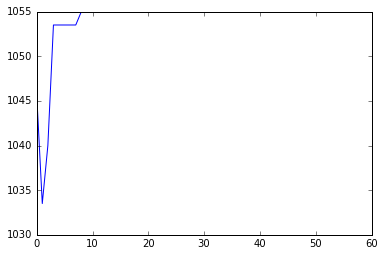

In [71]:
plot(w)

In [72]:
data_bid[data_bid['timestamp'].str.contains("08:45:43")][["bestprice","bestsize"]].head()

,bestprice,bestsize
1370,1055000,37


In [74]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bb = []
bb1 = []
bb2 = []
Time = []
for i in range(0,1,1):
    for j in range(0,7,1):
        a = "08:45:" + str(i) + str(j)
        Time.append(a)
        if len(data_bid[data_bid['timestamp'].str.contains(a)]) == 0:
            bb.append(bb[j-1])
        else:
            bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
            
        #bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
        #bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
        #x = pd.concat([bid[j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
        #bid.append(x[x.quantity_difference != 0])
        
        

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [75]:
#bb[3]
data_bid[data_bid['timestamp'].str.contains("08:45:3")]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
1359,2015/7/31,CNQ15,2015-07-31D08:45:30.010253900,1360,104,1,0,6,4486622ED586B466,980000,1,1,1055000,36
1360,2015/7/31,CNQ15,2015-07-31D08:45:30.164253900,1361,39,25,0,6,EC4F4636286F07CF,1027000,25,1,1055000,36
1362,2015/7/31,CNQ15,2015-07-31D08:45:30.329253900,1363,7,1,0,6,D2537FFF43832843,1052500,1,1,1055000,36
1363,2015/7/31,CNQ15,2015-07-31D08:45:31.170244900,1364,45,25,0,6,ECC7463EF3BCD31C,1021250,25,1,1055000,36
1364,2015/7/31,CNQ15,2015-07-31D08:45:31.177244900,1365,34,25,0,6,6CCF463EFA3ED99E,1035500,25,1,1055000,36
1365,2015/7/31,CNQ15,2015-07-31D08:45:31.180244900,1366,52,25,0,6,EC4F463E57B13711,1015500,25,1,1055000,36
1366,2015/7/31,CNQ15,2015-07-31D08:45:32.522235900,1367,39,50,0,6,D2D37FFF43402800,1030000,50,1,1055000,36
1367,2015/7/31,CNQ15,2015-07-31D08:45:33.515226900,1368,6,7,0,6,565FF3E77ACE5F8E,1054000,7,1,1055000,36
1369,2015/7/31,CNQ15,2015-07-31D08:45:37.491190900,1370,52,50,0,6,52DB7FFF39BE1E7E,1020000,50,1,1055000,36


In [77]:
#data_bid[data_bid['timestamp'] == '08:45:03']
#data_bid[data_bid['timestamp'].str.contains('08:45:03')]
len(data_bid[data_bid['timestamp'].str.contains('08:45:03')]) == 0

True

In [78]:
data_bid[data_bid['timestamp'].str.contains('08:45:07')]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
1285,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1286,5,30,0,6,D4AB7AEFB1F396F3,1053500,30,1,1055000,36
1286,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1287,1,-1,1,8,4448677231EE154E,1053500,0,1,1055000,36
1287,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1288,1,1,0,8,4448677231EE154E,1055000,1,1,1055000,36
1288,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1289,2,-1,1,8,E217E67EF6ACDAEC,1053500,0,1,1055000,36
1289,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1290,2,1,0,8,E217E67EF6ACDAEC,1055000,1,1,1055000,36
1290,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1291,3,-3,1,8,629F6276A44F888F,1053500,0,1,1055000,36
1291,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1292,3,3,0,8,629F6276A44F888F,1055000,3,1,1055000,36
1292,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1293,4,-1,1,8,EA08E322DAD0BDF0,1053500,0,1,1055000,36
1293,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1294,4,1,0,8,EA08E322DAD0BDF0,1055000,1,1,1055000,36
1294,2015/7/31,CNQ15,2015-07-31D08:45:07.212460900,1295,5,-30,1,8,D4AB7AEFB1F396F3,1053500,0,1,1055000,36


In [79]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))


for l in range(6,10,1):
    for i in range(0,6,1):
        bb = []
        bb1 = []
        bb2 = []
        for j in range(0,10,1):
            a = "08:4"+ str(l) + ":" + str(i) + str(j)
            #print i ,j
            bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
            #print j
            bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
            bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
            x = pd.concat([bid[i*10+j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
            bid.append(x[x.quantity_difference != 0])
        
len(bb),len(bb1),len(bb2),len(bid)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(10, 10, 10, 241)

In [82]:
w = []
for k in range(0,len(bid),1):
    w.append(bid[k].iloc[0]["price"]/100.0)

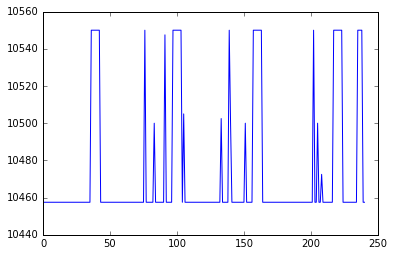

In [83]:
plot(w)

In [84]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))


for l in range(5,10,1):
    for i in range(0,6,1):
        bb = []
        bb1 = []
        bb2 = []
        for j in range(0,10,1):
            a = "08:4" + str(l) + ":" + str(i) + str(j)
            #print l, i ,j
            bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
            #print j
            bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
            bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
            x = pd.concat([bid[(l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
            bid.append(x[x.quantity_difference != 0])


len(bb),len(bb1),len(bb2),len(bid)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(10, 10, 10, 301)

In [85]:
"08:4" + str(6) + ":" + str(1) + str(1)

'08:46:11'

([<matplotlib.lines.Line2D at 0x7f65506c02d0>], 301)

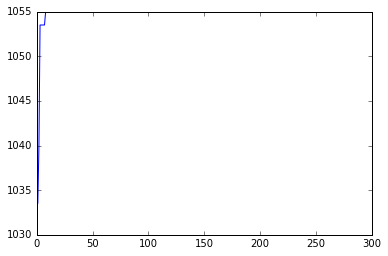

In [86]:
w = []
for k in range(0,len(bid),1):
    w.append(bid[k].iloc[0]["price"]/1000.0)
plot(w),len(w)

In [91]:
data_bid[data_bid['timestamp'].str.contains('08:49:')]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
1411,2015/7/31,CNQ15,2015-07-31D08:49:18.687201900,1412,58,3,0,6,D4D7FFAFB7DD99FD,1021250,3,1,1055000,37
1412,2015/7/31,CNQ15,2015-07-31D08:49:18.814201900,1413,59,1,0,6,7C37F6E7FDE1E2E1,1021000,1,1,1055000,37
1414,2015/7/31,CNQ15,2015-07-31D08:49:21.104183900,1415,7,1,0,6,4E9DEE3E29320812,1055000,1,1,1055000,38
1415,2015/7/31,CNQ15,2015-07-31D08:49:24.658147900,1416,123,1,0,6,FCB7F6E7A9DD8EDD,991000,1,1,1055000,38
1416,2015/7/31,CNQ15,2015-07-31D08:49:24.742147900,1417,16,-1,1,1,4898CA7651AE30AE,1050000,0,1,1055000,38
1419,2015/7/31,CNQ15,2015-07-31D08:49:27.395127600,1420,19,1,0,6,CAC86A7E6E4E4F8E,1047250,1,1,1055000,38
1420,2015/7/31,CNQ15,2015-07-31D08:49:28.467111900,1421,70,1,0,6,DE827FEF62A64506,1015750,1,1,1055000,38
1421,2015/7/31,CNQ15,2015-07-31D08:49:29.875102900,1422,138,1,0,6,FC3FF6E787B56CB5,961000,1,1,1055000,38
1428,2015/7/31,CNQ15,2015-07-31D08:49:54.375886500,1429,8,1,0,6,E218672296CB79EB,1055000,1,1,1055000,39
1429,2015/7/31,CNQ15,2015-07-31D08:49:54.931877500,1430,11,1,0,6,C2CF6E7E186DFCAE,1054500,1,1,1055000,39


In [ ]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))


for l in range(5,10,1):
    for i in range(0,6,1):
        bb = []
        bb1 = []
        bb2 = []
        for j in range(0,10,1):
            a = "08:4" + str(l) + ":" + str(i) + str(j)
            #print l, i ,j
            bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
            #print j
            bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
            bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
            x = pd.concat([bid[(l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
            bid.append(x[x.quantity_difference != 0])


len(bb),len(bb1),len(bb2),len(bid)

In [101]:
bid[300]

,price,quantity_difference
84,1055000,44
83,1054750,36
82,1054500,1
81,1054000,7
80,1053500,50
79,1050500,1
78,1050250,1
77,1050000,2
76,1049500,3
75,1048250,1


In [257]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))

for t in range(4,6,1):
    for l in range(5,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[(t-4)*300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])
for t in range(0,1,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "09:"+ str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[600 + t*600 + l*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])
                
                
                
                

len(bb),len(bb1),len(bb2),len(bid)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(10, 10, 10, 601)

In [258]:
for t in range(0,1,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "09:"+ str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[600 + t*600 + l*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])
        
len(bb),len(bb1),len(bb2),len(bid)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(10, 10, 10, 1201)

In [259]:
bid[1200]

,price,quantity_difference
156,1066750,9
155,1066500,28
154,1066250,19
153,1066000,60
152,1065750,16
151,1065500,61
150,1065250,21
149,1065000,19
148,1064750,21
147,1064500,12


In [260]:
data_bid[data_bid['timestamp'].str.contains('09:09:5')]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
10651,2015/7/31,CNQ15,2015-07-31D09:09:51.831131100,10652,138,-1,1,1,6CCF623E7A685A08,1056750,0,1,1066750,6
10652,2015/7/31,CNQ15,2015-07-31D09:09:51.902125300,10653,158,1,0,6,CA8FC676FB31DA91,1055250,1,1,1066750,6
10660,2015/7/31,CNQ15,2015-07-31D09:09:52.397122100,10661,23,-30,1,5,6CD0E26E98ED7A4D,1065750,0,1,1066750,6
10661,2015/7/31,CNQ15,2015-07-31D09:09:52.397122100,10662,18,30,0,6,6CD0E26E98ED7A4D,1066000,30,1,1066750,6
10662,2015/7/31,CNQ15,2015-07-31D09:09:52.399122100,10663,13,3,0,6,EC93E67E683A4C5A,1066250,3,1,1066750,6
10664,2015/7/31,CNQ15,2015-07-31D09:09:52.401122100,10665,9,2,0,6,C0996F6A1FD90339,1066500,2,1,1066750,6
10669,2015/7/31,CNQ15,2015-07-31D09:09:56.493086100,10670,3,2,0,6,4204EA7E4D272E87,1066750,2,1,1066750,8
10670,2015/7/31,CNQ15,2015-07-31D09:09:56.494086100,10671,4,1,0,6,EC40C32A1387F7A8,1066750,1,1,1066750,9
10671,2015/7/31,CNQ15,2015-07-31D09:09:56.494086100,10672,12,2,0,6,C2896F22CB6DAECD,1066500,2,1,1066750,9
10672,2015/7/31,CNQ15,2015-07-31D09:09:56.496086100,10673,13,2,0,6,CE434F72D81ABB3A,1066500,2,1,1066750,9


In [206]:
for t in range(0,2,1):
    for l in range(0,5,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "09:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[600 + (t)*300 + (l)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [227]:
bid[660]

,price,quantity_difference
80,1062500,-2
79,1062250,-14
78,1062000,-5
77,1056250,2
76,1056000,4
75,1055250,4
74,1055000,37
73,1054000,7
72,1053500,50
71,1050000,2


In [108]:
data_bid[data_bid['timestamp'].str.contains('08:59:0')]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
1814,2015/7/31,CNQ15,2015-07-31D08:59:04.308945500,1815,110,5,0,6,CA48EB2A598E3CAE,1035000,5,1,1060500,87
1816,2015/7/31,CNQ15,2015-07-31D08:59:08.698900500,1817,47,1,0,6,F29673AF3EFC215C,1053500,1,1,1060500,87
1817,2015/7/31,CNQ15,2015-07-31D08:59:08.784900500,1818,46,1,0,6,485A6E6640F01FD0,1054000,1,1,1060500,87


([<matplotlib.lines.Line2D at 0x7f655086bfd0>], 601)

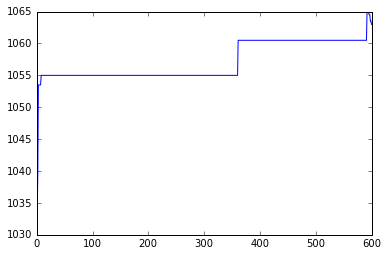

In [112]:
w = []
for k in range(0,len(bid),1):
    w.append(bid[k].iloc[0]["price"]/1000.0)
plot(w),len(w)

In [111]:
data_bid

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
0,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,1,1,5,0,30,72D0F3B75B454045,988500,5,1,1041500,1
2,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,3,2,1,0,30,DC6ADEBB6E535353,979000,1,1,1041500,1
3,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,4,3,2,0,30,4005CE3E43912211,950000,2,1,1041500,1
4,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,5,1,1,0,30,FE457FBF87856C85,1041500,1,1,1041500,1
5,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,6,2,2,0,30,E33BA3AF1965F906,1008000,2,1,1041500,1
6,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,7,5,1,0,30,54F252BB0DE2F2E3,969250,1,1,1041500,1
7,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,8,7,1,0,30,D472DABB94327932,949000,1,1,1041500,1
8,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,9,8,1,0,30,54FADAB3464C2B4C,948750,1,1,1041500,1
9,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,10,2,1,0,30,4D602BF798E67886,1020000,1,1,1041500,1
13,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,14,5,5,0,30,6AD3CB22C767AAC7,981750,5,1,1041500,1


In [113]:
15*60*2

1800

In [189]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))

for h in range(8,10,1):
    if h == 8:
        a1 = 4
        a2 = 6
        b1 = 5
        b2 = 10
        c1 = 4
        c2 = 5
    elif h == 9:
        a1 = 0
        a2 = 2   
        b1 = 0
        b2 = 6 
        c1 = 0
        c2 = 0
    for t in range(a1,a2,1):
        for l in range(b1,b2,1):
            for i in range(0,6,1):
                bb = []
                bb1 = []
                bb2 = []
                for j in range(0,10,1):
                    a = "0" + str(h) + ":" + str(t) + str(l) + ":" + str(i) + str(j)
                    #print l, i ,j
                    bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                    #print j
                    bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                    bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                    x = pd.concat([bid[(h - 8)*600 + (t - c1)*300 + (l - c2)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                    bid.append(x[x.quantity_difference != 0])
    #elif h == 9:
    #     for t in range(0,6,1):
    #        for l in range(0,10,1):
    #            for i in range(0,6,1):
    #                bb = []
    #                bb1 = []
    #                bb2 = []
    #                for j in range(0,10,1):
    #                    a = "0" + str(h) + ":" + str(t) + str(l) + ":" + str(i) + str(j)
    #                    #print l, i ,j
    #                    bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
    #                    #print j
    #                    bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
    #                    bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
    #                    x = pd.concat([bid[(h-8)*600 + (t-4)*300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
    #                    bid.append(x[x.quantity_difference != 0])       
                
                
                
                

len(bb),len(bb1),len(bb2),len(bid)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:38: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(10, 10, 10, 1321)

In [197]:
data_bid[data_bid['timestamp'].str.contains('09:14:4')]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
13123,2015/7/31,CNQ15,2015-07-31D09:14:40.185539100,13124,3,20,0,6,D80377B7E7D9C9F9,1068000,20,1,1068000,24
13127,2015/7/31,CNQ15,2015-07-31D09:14:40.191539100,13128,9,2,0,6,C4436676903E745E,1067750,2,1,1068000,24
13128,2015/7/31,CNQ15,2015-07-31D09:14:40.191539100,13129,10,2,0,6,CEDCE3722C350FB5,1067750,2,1,1068000,24
13130,2015/7/31,CNQ15,2015-07-31D09:14:40.194539100,13131,11,2,0,6,4E53C77AEDCAD0EA,1067750,2,1,1068000,24
13131,2015/7/31,CNQ15,2015-07-31D09:14:40.194539100,13132,1,3,0,6,C64B6E6AB8DB959B,1068250,3,1,1068250,3
13136,2015/7/31,CNQ15,2015-07-31D09:14:40.204539100,13137,5,3,0,6,DAB77AF7892A6E2A,1068000,3,1,1068250,3
13137,2015/7/31,CNQ15,2015-07-31D09:14:40.208539100,13138,2,1,0,6,C6CB6E6A53F730B7,1068250,1,1,1068250,4
13140,2015/7/31,CNQ15,2015-07-31D09:14:40.211539100,13141,9,-3,1,1,52B7FAFF5BCA40CA,1067750,0,1,1068250,4
13143,2015/7/31,CNQ15,2015-07-31D09:14:40.248539100,13144,10,-3,1,5,D8705EA3FCD7E197,1067750,0,1,1068250,7
13144,2015/7/31,CNQ15,2015-07-31D09:14:40.248539100,13145,3,3,0,6,D8705EA3FCD7E197,1068250,3,1,1068250,7


In [164]:
bid[1300]

,price,quantity_difference
159,1068250,10
158,1068000,6
157,1067750,17
156,1067500,4
155,1067250,54
154,1067000,21
153,1066750,5
152,1066500,-6
151,1066250,14
150,1066000,7


In [176]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))

for t in range(4,6,1):
    for l in range(5,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[(t-4)*300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])

                
for t in range(0,2,1):
    for l in range(0,5,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "09:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[600 + (t)*300 + (l)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])

len(bb),len(bb1),len(bb2),len(bid)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning: sort(columns

(10, 10, 10, 1201)

In [187]:
bid[1190]

,price,quantity_difference
155,1067750,21
154,1067500,32
153,1067250,31
152,1067000,55
151,1066750,42
150,1066500,-8
149,1066250,22
148,1066000,-7
147,1065750,15
146,1065500,61


In [ ]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))


for t in range(4,6,1):
    for l in range(5,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[(t-4)*300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])

                


In [388]:
b = []
b1 = []
b2 = []
bid = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_bid[data_bid['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
bid.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))

for t in range(4,5,1):
    for l in range(5,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[(t-4)*300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])

for t in range(5,6,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[300 + (t-4)*300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])
                
for t in range(0,1,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "09:"+ str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_bid[data_bid['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([bid[900 + t*600 + l*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                bid.append(x[x.quantity_difference != 0])
                          
len(bb),len(bb1),len(bb2),len(bid)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: FutureWarning: sort(columns

(10, 10, 10, 1501)

([<matplotlib.lines.Line2D at 0x7f654c37a410>], 1501)

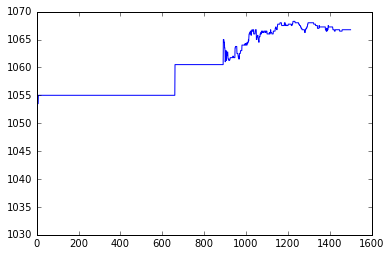

In [389]:
w = []
for k in range(0,len(bid),1):
    w.append(bid[k].iloc[0]["price"]/1000.0)
plot(w),len(w)

In [363]:
a = []
a1 = []
a2 = []
ask = []
for i in range(48,50,1):
    b = "04:27:" + str(i)
    a.append(data_ask[data_ask['timestamp'].str.contains(b)])
    a1.append(a[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    a2.append(a1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
ask.append(pd.concat([a2[0],a2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
len(a),len(a1),len(a2),len(ask)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(2, 2, 2, 1)

In [364]:
ask

[      price  quantity_difference
 11  1150000                    1
 10  1142000                  266
 9   1135000                    1
 8   1130000                    1
 7   1125000                    2
 6   1122000                    5
 5   1115000                    3
 4   1109000                    1
 3   1100000                    1
 2   1095250                    1
 1   1095000                   11
 0   1090000                    5]

In [384]:
a = []
a1 = []
a2 = []
ask = []
for i in range(48,50,1):
    b = "04:27:" + str(i)
    a.append(data_ask[data_ask['timestamp'].str.contains(b)])
    a1.append(a[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    a2.append(a1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
ask.append(pd.concat([a2[0],a2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))

for t in range(4,5,1):
    for l in range(5,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_ask[data_ask['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([ask[(l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                ask.append(x[x.quantity_difference != 0])

for t in range(5,6,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_ask[data_ask['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([ask[300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                ask.append(x[x.quantity_difference != 0])
                        
len(bb),len(bb1),len(bb2),len(ask)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: FutureWarning: sort(columns

(10, 10, 10, 901)

In [415]:
b = []
b1 = []
b2 = []
ask = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_ask[data_ask['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
ask.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))

for t in range(4,5,1):
    for l in range(5,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_ask[data_ask['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([ask[(t-4)*300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                ask.append(x[x.quantity_difference != 0])

for t in range(5,6,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_ask[data_ask['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([ask[300 + (t-4)*300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                ask.append(x[x.quantity_difference != 0])
                
for t in range(0,1,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "09:"+ str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_ask[data_ask['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([ask[900 + t*600 + l*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                ask.append(x[x.quantity_difference != 0])                
                                     
len(bb),len(bb1),len(bb2),len(ask)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: FutureWarning: sort(columns

(10, 10, 10, 1501)

In [416]:
a = 1500
ask[a]

,price,quantity_difference
103,1157250,20
102,1154750,25
101,1152750,1
100,1152500,10
99,1151000,10
98,1150000,3
97,1149750,1
96,1148000,1
95,1147500,1
94,1142000,267


In [431]:
ask[1500][len(ask[1500])-1:len(ask[1500])].iloc[0]["price"]

1067500

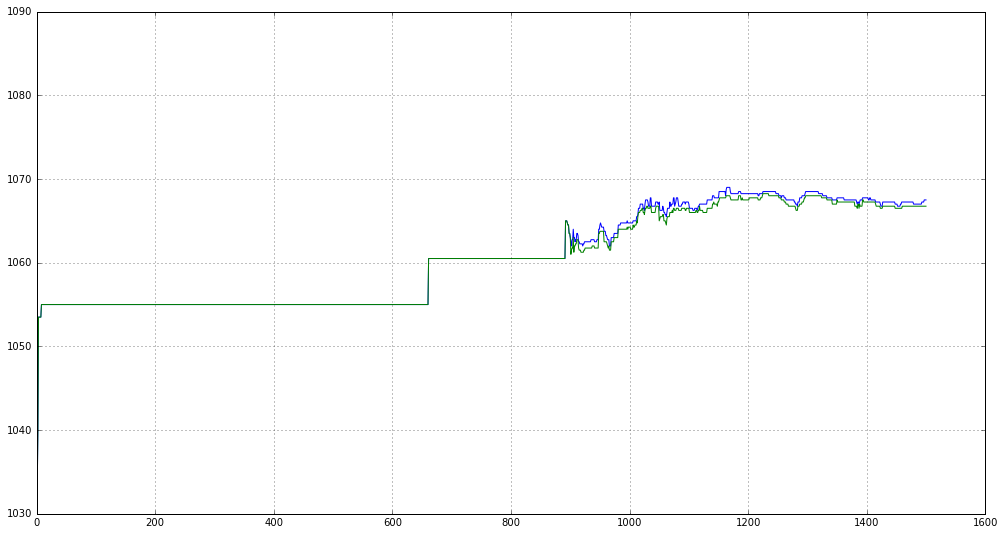

In [443]:
import matplotlib.pyplot as plt

plt.figure(figsize = (17,9))
plt.grid()

w1 = []
for k in range(0,len(ask),1):
    w1.append(ask[k][len(ask[k])-1:len(ask[k])].iloc[0]["price"]/1000.0)
plot(w1)

w2 = []
for k in range(0,len(bid),1):
    w2.append(bid[k].iloc[0]["price"]/1000.0)
plot(w2)


In [410]:
b = []
b1 = []
b2 = []
ask = []
for i in range(48,50,1):
    a = "04:27:" + str(i)
    b.append(data_ask[data_ask['timestamp'].str.contains(a)])
    b1.append(b[i-48][['price','quantity_difference']].sort(['price'],ascending = [False]))
    b2.append(b1[i-48].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
ask.append(pd.concat([b2[0],b2[1]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))




len(ask)

/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/rory/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


1

In [417]:
data_ask[data_ask['timestamp'].str.contains('09:09:')]#[:len(data_ask[data_ask['timestamp'].str.contains('04:27:')])]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
10526,2015/7/31,CNQ15,2015-07-31D09:09:01.406581100,10527,83,-1,1,1,DAC3FBAFC3DEA5FE,1073000,0,2,1067250,3
10527,2015/7/31,CNQ15,2015-07-31D09:09:01.508581100,10528,2,1,0,6,F4E7F2EF2B631063,1067250,1,2,1067250,4
10528,2015/7/31,CNQ15,2015-07-31D09:09:01.550581100,10529,22,10,0,6,FA7F7ABFE383C883,1068000,10,2,1067250,4
10529,2015/7/31,CNQ15,2015-07-31D09:09:01.744579100,10530,3,5,0,6,D06852AB2AF60FB6,1067250,5,2,1067250,9
10530,2015/7/31,CNQ15,2015-07-31D09:09:02.332572100,10531,27,-1,1,1,D01F7BFF4BEF30AF,1068250,0,2,1067250,9
10531,2015/7/31,CNQ15,2015-07-31D09:09:06.593536100,10532,1,-2,2,3,4298C63EE3FAC2FA,1067250,1,2,1067250,7
10532,2015/7/31,CNQ15,2015-07-31D09:09:06.742535300,10533,48,1,0,6,EC0A622E44A12381,1069500,1,2,1067250,7
10533,2015/7/31,CNQ15,2015-07-31D09:09:07.304527100,10534,1,5,0,6,D068D2A3F3D3D893,1067000,5,2,1067000,5
10534,2015/7/31,CNQ15,2015-07-31D09:09:07.310527100,10535,113,1,0,6,E257EE2EA33E86DE,1077000,1,2,1067000,5
10535,2015/7/31,CNQ15,2015-07-31D09:09:07.351527100,10536,2,5,0,6,4A90463EEEA9CDA9,1067000,5,2,1067000,10


In [ ]:
for t in range(5,6,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "08:" + str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_ask[data_ask['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([ask[300 + (t-4)*300 + (l-5)*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                ask.append(x[x.quantity_difference != 0])
                
for t in range(0,1,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "09:"+ str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_ask[data_ask['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([ask[900 + t*600 + l*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                ask.append(x[x.quantity_difference != 0])

In [ ]:
for t in range(0,1,1):
    for l in range(0,10,1):
        for i in range(0,6,1):
            bb = []
            bb1 = []
            bb2 = []
            for j in range(0,10,1):
                a = "09:"+ str(t) + str(l) + ":" + str(i) + str(j)
                #print l, i ,j
                bb.append(data_ask[data_ask['timestamp'].str.contains(a)])
                #print j
                bb1.append(bb[j][['price','quantity_difference']].sort(['price'],ascending = [False]))
                bb2.append(bb1[j].groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False]))
                x = pd.concat([ask[600 + t*600 + l*60 + i*10 + j],bb2[j]]).groupby(by=['price'],as_index = False).sum().sort(['price'],ascending = [False])
                ask.append(x[x.quantity_difference != 0])
len(bb),len(bb1),len(bb2),len(ask)                       

In [308]:
ask[1200]

,price,quantity_difference
100,1157250,20
99,1154750,25
98,1152750,1
97,1151000,10
96,1150000,3
95,1149750,1
94,1148000,1
93,1142000,267
92,1141000,27
91,1140000,2


([<matplotlib.lines.Line2D at 0x7f654f2c8f90>], 1)

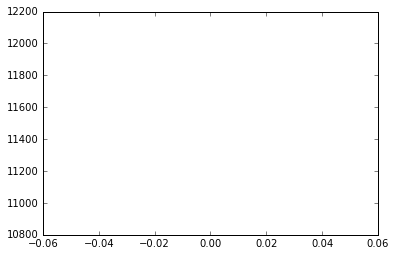

In [300]:
w = []
for k in range(0,len(ask),1):
    w.append(ask[k].iloc[0]["price"]/100.0)
plot(w),len(w)

11500.0

In [306]:
data_ask[data_ask['timestamp'].str.contains('04:27:49')]

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
11,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,12,2,2,0,30,4E4E427E47AB268B,1125000,2,2,1095000,10
12,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,13,1,1,0,30,C560ABFF918C712C,1100000,1,2,1095000,10
16,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,17,3,5,0,30,6ECEE6665AE33A83,1122000,5,2,1095000,10
21,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,22,1,10,0,30,78B85AF74BAA30AA,1095000,10,2,1095000,10
23,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,24,7,1,0,30,D8B2D6FB2CFD11FD,1150000,1,2,1095000,10
32,2015/7/31,CNQ15,2015-07-31D04:27:49.006487100,33,3,1,0,30,D66756AFBCC5A1C5,1109000,1,2,1095000,10
33,2015/7/31,CNQ15,2015-07-31D04:27:49.006487100,34,7,1,0,30,762152A7A7478C47,1135000,1,2,1095000,10
36,2015/7/31,CNQ15,2015-07-31D04:27:49.009487100,37,2,1,0,30,D21AFFF792F47514,1095000,1,2,1090000,5
37,2015/7/31,CNQ15,2015-07-31D04:27:49.009487100,38,1,5,0,30,EECE666EBC899C29,1090000,5,2,1090000,5
38,2015/7/31,CNQ15,2015-07-31D04:27:49.009487100,39,4,1,0,30,D479FEBF20CB05CB,1095250,1,2,1090000,5


In [303]:
data_ask

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
1,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,2,1,266,0,30,C8946636EB1CCE9C,1142000,266,2,1115000,3
10,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,11,1,3,0,30,6E1E427E71C550A5,1115000,3,2,1115000,3
11,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,12,2,2,0,30,4E4E427E47AB268B,1125000,2,2,1095000,10
12,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,13,1,1,0,30,C560ABFF918C712C,1100000,1,2,1095000,10
16,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,17,3,5,0,30,6ECEE6665AE33A83,1122000,5,2,1095000,10
21,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,22,1,10,0,30,78B85AF74BAA30AA,1095000,10,2,1095000,10
23,2015/7/31,CNQ15,2015-07-31D04:27:49.003487100,24,7,1,0,30,D8B2D6FB2CFD11FD,1150000,1,2,1095000,10
32,2015/7/31,CNQ15,2015-07-31D04:27:49.006487100,33,3,1,0,30,D66756AFBCC5A1C5,1109000,1,2,1095000,10
33,2015/7/31,CNQ15,2015-07-31D04:27:49.006487100,34,7,1,0,30,762152A7A7478C47,1135000,1,2,1095000,10
36,2015/7/31,CNQ15,2015-07-31D04:27:49.009487100,37,2,1,0,30,D21AFFF792F47514,1095000,1,2,1090000,5


In [444]:
data

,date,series,timestamp,sequence_number,ob_position,quantity_difference,ob_command,change_reason,order_number,price,mp_quantity,bid_or_ask,bestprice,bestsize
0,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,1,1,5,0,30,72D0F3B75B454045,988500,5,1,1041500,1
1,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,2,1,266,0,30,C8946636EB1CCE9C,1142000,266,2,1115000,3
2,2015/7/31,CNQ15,2015-07-31D04:27:48.997487100,3,2,1,0,30,DC6ADEBB6E535353,979000,1,1,1041500,1
3,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,4,3,2,0,30,4005CE3E43912211,950000,2,1,1041500,1
4,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,5,1,1,0,30,FE457FBF87856C85,1041500,1,1,1041500,1
5,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,6,2,2,0,30,E33BA3AF1965F906,1008000,2,1,1041500,1
6,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,7,5,1,0,30,54F252BB0DE2F2E3,969250,1,1,1041500,1
7,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,8,7,1,0,30,D472DABB94327932,949000,1,1,1041500,1
8,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,9,8,1,0,30,54FADAB3464C2B4C,948750,1,1,1041500,1
9,2015/7/31,CNQ15,2015-07-31D04:27:48.998487100,10,2,1,0,30,4D602BF798E67886,1020000,1,1,1041500,1
